<a href="https://colab.research.google.com/github/Denver04/Performance-Detector/blob/master/Employee_Performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip archive.zip

Archive:  archive.zip
  inflating: garments_worker_productivity.csv  


In [1]:
import pandas as pd
df = pd.read_csv("garments_worker_productivity.csv")
df.head(5)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [2]:
df["date"] = pd.to_datetime(df["date"])

In [3]:
df['department'].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

<Axes: ylabel='department'>

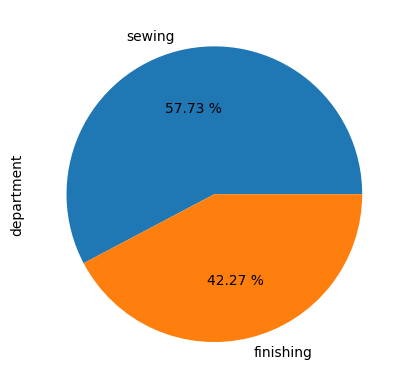

In [4]:
# merging finishing dept
df['department'] = df['department'].apply(lambda x: 'finishing' if x.replace(" ","") == 'finishing' else 'sewing' )
df.department.value_counts().plot.pie(autopct='%.2f %%')

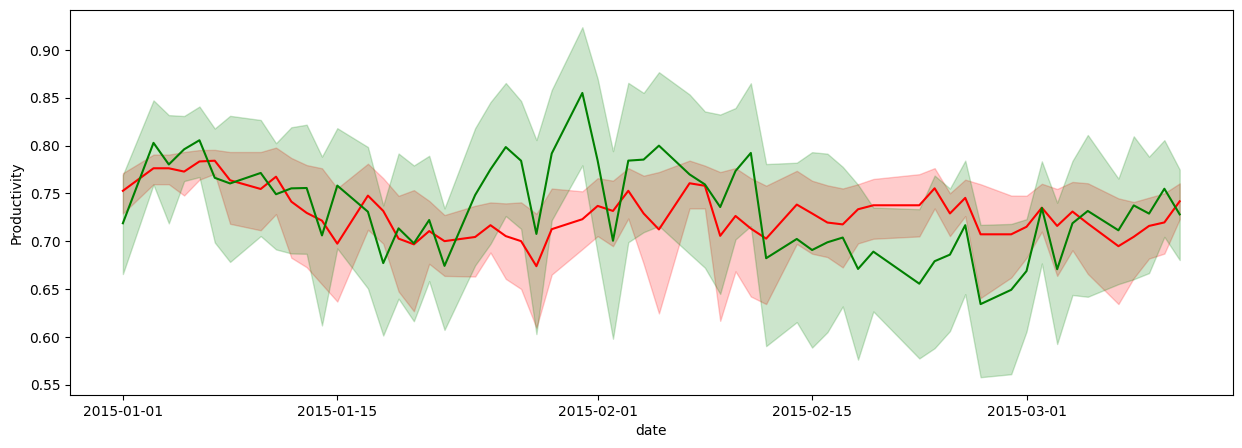

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
ax=sns.lineplot(y='targeted_productivity',x='date' ,color = "red", data =df,legend='brief')
ax=sns.lineplot(y= 'actual_productivity',x='date',data=df, color="green", legend = 'brief')
ax.set(ylabel = 'Productivity')
plt.show()

productivity on Thursday is  0.7226408815326634
productivity on Saturday is  0.7519288593743317
productivity on Sunday is  0.7286041288078818
productivity on Monday is  0.7354884994170856
productivity on Tuesday is  0.742700917676617
productivity on Wednesday is  0.7304619085144229


<Axes: >

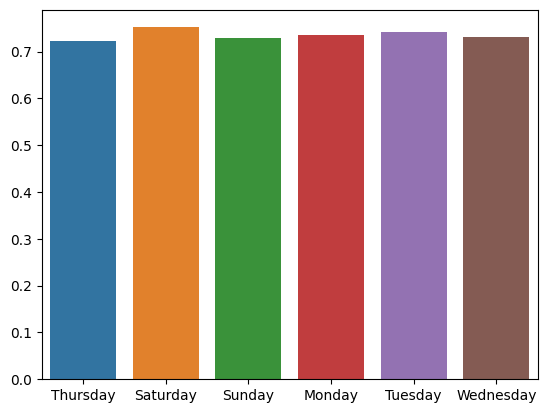

In [6]:
l = []
l1=[]
column_name = "day"
for i in list(df[column_name].unique()):
  print( f"productivity on {i} is ",df[df[column_name] == i]["actual_productivity"].mean())
  l.append(df[df[column_name] == i]["actual_productivity"].mean())
  l1.append(i)
dictionary = {"data":l,"keys":l1}
sns.barplot( x = "keys" , y = "data", data = dictionary)

productivity on Quarter1 is  0.7515597809499999
productivity on Quarter2 is  0.7437097343044775
productivity on Quarter3 is  0.7047586173428572
productivity on Quarter4 is  0.7090671237096774
productivity on Quarter5 is  0.8261773779090912


<Axes: >

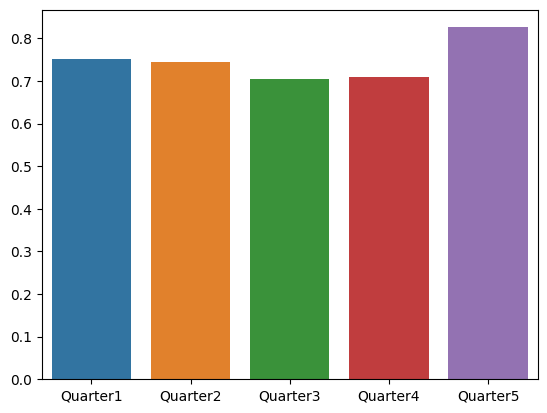

In [7]:
l = []
l1=[]
column_name = "quarter"
for i in list(df[column_name].unique()):
  print( f"productivity on {i} is ",df[df[column_name] == i]["actual_productivity"].mean())
  l.append(df[df[column_name] == i]["actual_productivity"].mean())
  l1.append(i)
dictionary = {"data":l,"keys":l1}
sns.barplot( x = "keys" , y = "data", data = dictionary)

productivity on 8 is  0.67414810659633
productivity on 1 is  0.8210543824666665
productivity on 11 is  0.6819845691931818
productivity on 12 is  0.7790554071515153
productivity on 6 is  0.6853852354148937
productivity on 7 is  0.6680055056458333
productivity on 2 is  0.7708551285779817
productivity on 3 is  0.8038798219052631
productivity on 9 is  0.7344619130769231
productivity on 10 is  0.7197362001500001
productivity on 5 is  0.6979807909032258
productivity on 4 is  0.7700348248857143


<Axes: >

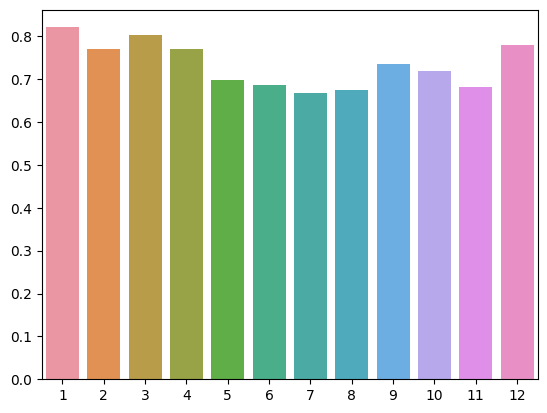

In [8]:
l = []
l1=[]
column_name = "team"
for i in list(df[column_name].unique()):
  print( f"productivity on {i} is ",df[df[column_name] == i]["actual_productivity"].mean())
  l.append(df[df[column_name] == i]["actual_productivity"].mean())
  l1.append(i)
dictionary = {"data":l,"keys":l1}
sns.barplot( x = "keys" , y = "data", data = dictionary)

productivity on sewing is  0.7220130317105644
productivity on finishing is  0.7529506683241106


<Axes: >

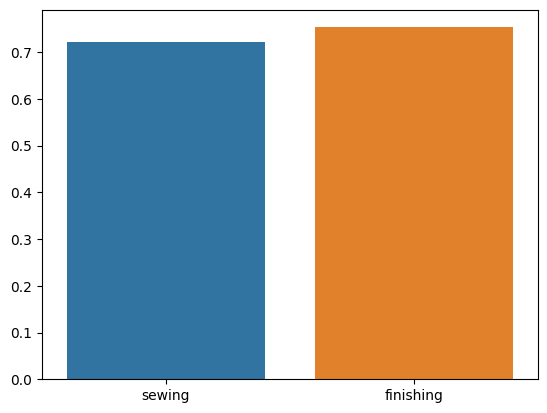

In [9]:
l = []
l1=[]
column_name = "department"
for i in list(df[column_name].unique()):
  print( f"productivity on {i} is ",df[df[column_name] == i]["actual_productivity"].mean())
  l.append(df[df[column_name] == i]["actual_productivity"].mean())
  l1.append(i)
dictionary = {"data":l,"keys":l1}
sns.barplot( x = "keys" , y = "data", data = dictionary)

In [10]:
# As we can see above, productivity does not depend on the team, category, Quarter, or day.

<ipython-input-11-4644e5ac5733>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = df.corr()


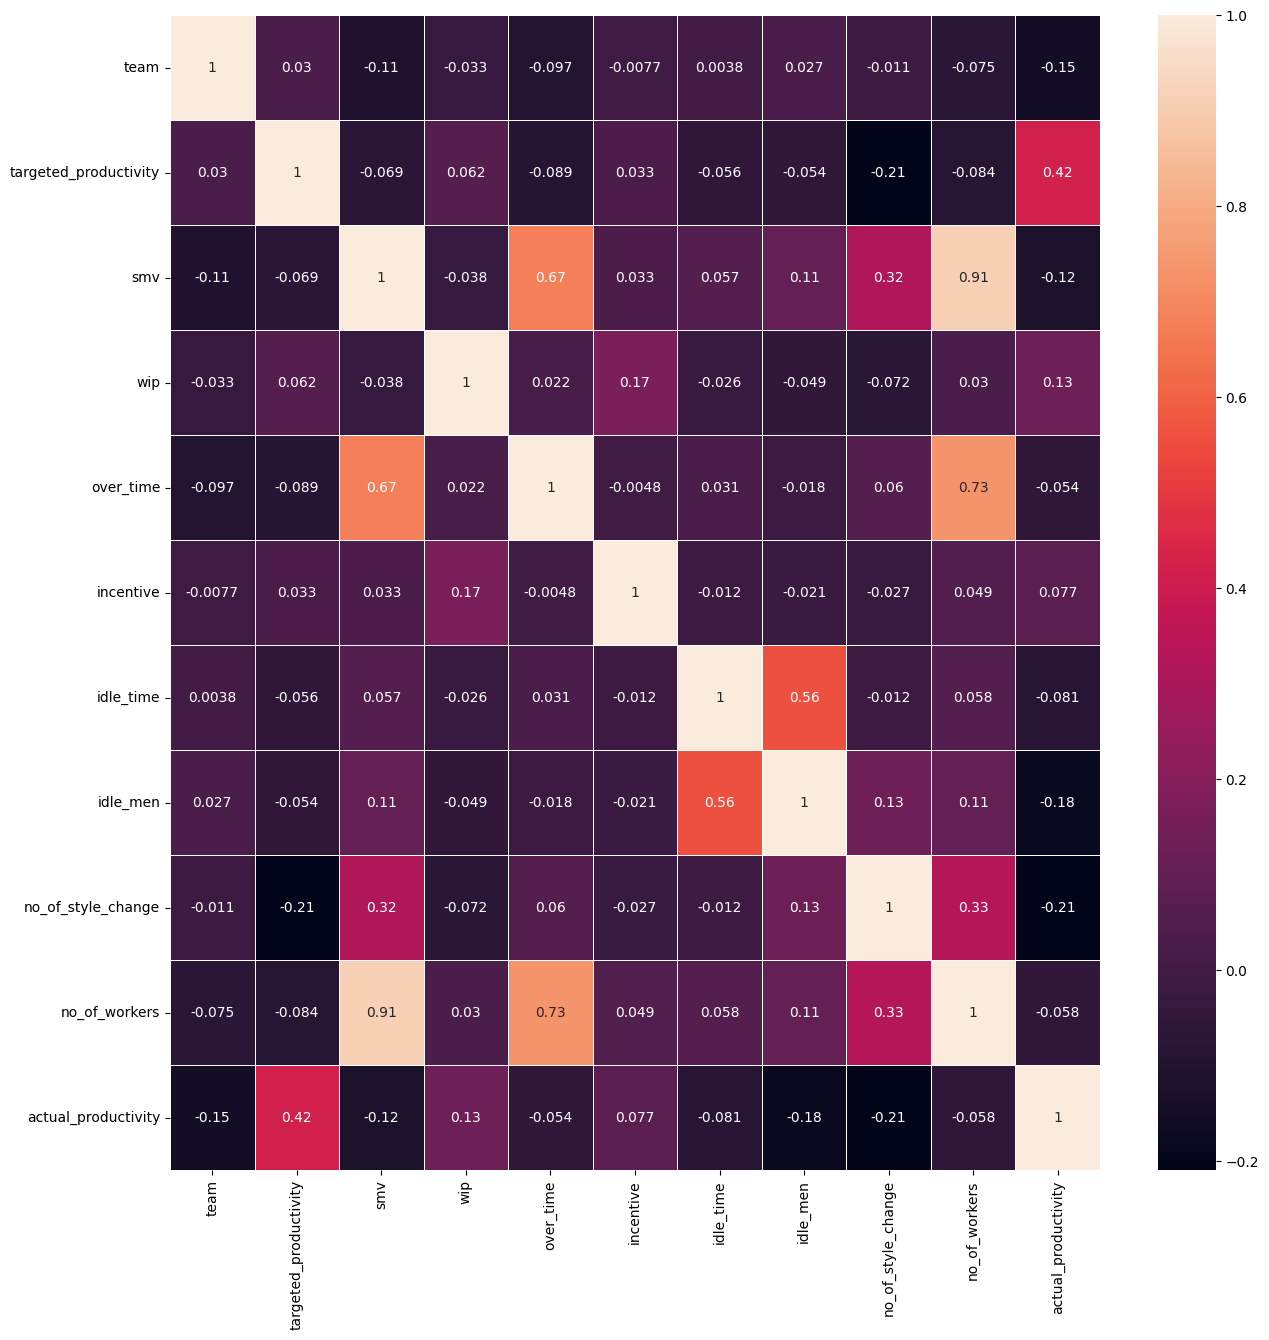

In [11]:
corrMatrix = df.corr()
fig, ax = plt.subplots(figsize=(15,15)) # Sample figsize in inches
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()

In [12]:
df.date


0      2015-01-01
1      2015-01-01
2      2015-01-01
3      2015-01-01
4      2015-01-01
          ...    
1192   2015-03-11
1193   2015-03-11
1194   2015-03-11
1195   2015-03-11
1196   2015-03-11
Name: date, Length: 1197, dtype: datetime64[ns]

In [13]:
df['month']=df['date'].dt.month
df.drop(['date'],axis=1, inplace=True)

In [14]:
# This will Display the percentage of missing values per column
df.isnull().sum() / len(df) * 100 

quarter                   0.000000
department                0.000000
day                       0.000000
team                      0.000000
targeted_productivity     0.000000
smv                       0.000000
wip                      42.272348
over_time                 0.000000
incentive                 0.000000
idle_time                 0.000000
idle_men                  0.000000
no_of_style_change        0.000000
no_of_workers             0.000000
actual_productivity       0.000000
month                     0.000000
dtype: float64

In [15]:
df.drop(['wip'],axis=1, inplace=True)


In [16]:
df_og = df.copy()

In [17]:
df.head()




,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
0,Quarter1,sewing,Thursday,8,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725,1
1,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500,1
2,Quarter1,sewing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,1
3,Quarter1,sewing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,1
4,Quarter1,sewing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,1


In [18]:
df.shape

(1197, 14)

In [19]:
# encoding categorical/ non-numerical data
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import pickle

# Define the features to encode
features_to_encode = ['quarter', 'department', 'day', 'team', 'month']

# Create the OneHotEncoder with sparse_output = False
encoder = OneHotEncoder(sparse_output=False)

# Fit the encoder to the data
encoder.fit(df[features_to_encode])

# Transform the data using the encoder
encoded_data = encoder.transform(df[features_to_encode])

# Create a new DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(features_to_encode))





In [20]:
encoded_df.head()

,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sewing,day_Monday,day_Saturday,day_Sunday,...,team_6,team_7,team_8,team_9,team_10,team_11,team_12,month_1,month_2,month_3
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [21]:
encoded_df.shape

(1197, 28)

In [22]:
df_all = pd.concat([df.drop(features_to_encode, axis=1), encoded_df], axis=1)

In [23]:
df_all.head()

,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,quarter_Quarter1,...,team_6,team_7,team_8,team_9,team_10,team_11,team_12,month_1,month_2,month_3
0,0.80,26.16,7080,98,0.0,0,0,59.0,0.940725,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [29]:
with open('encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

In [30]:
testd = df_og[1:]

In [31]:
testd.head()

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,month
1,Quarter1,finishing,Thursday,1,0.75,3.94,960,0,0.0,0,0,8.0,0.886500,1
2,Quarter1,sewing,Thursday,11,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,1
3,Quarter1,sewing,Thursday,12,0.80,11.41,3660,50,0.0,0,0,30.5,0.800570,1
4,Quarter1,sewing,Thursday,6,0.80,25.90,1920,50,0.0,0,0,56.0,0.800382,1
5,Quarter1,sewing,Thursday,7,0.80,25.90,6720,38,0.0,0,0,56.0,0.800125,1


In [33]:
encoded_new_data = encoder.transform(testd[features_to_encode])

In [34]:
encoded__testdf = pd.DataFrame(encoded_new_data, columns=encoder.get_feature_names_out(features_to_encode))

In [35]:
encoded__testdf.head()

,quarter_Quarter1,quarter_Quarter2,quarter_Quarter3,quarter_Quarter4,quarter_Quarter5,department_finishing,department_sewing,day_Monday,day_Saturday,day_Sunday,...,team_6,team_7,team_8,team_9,team_10,team_11,team_12,month_1,month_2,month_3
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [36]:
testx = pd.concat([testd.drop(features_to_encode, axis=1), encoded__testdf], axis=1)

In [37]:
testx.head()

,targeted_productivity,smv,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity,quarter_Quarter1,...,team_6,team_7,team_8,team_9,team_10,team_11,team_12,month_1,month_2,month_3
1,0.75,3.94,960.0,0.0,0.0,0.0,0.0,8.0,0.886500,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.80,11.41,3660.0,50.0,0.0,0.0,0.0,30.5,0.800570,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.80,11.41,3660.0,50.0,0.0,0.0,0.0,30.5,0.800570,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.80,25.90,1920.0,50.0,0.0,0.0,0.0,56.0,0.800382,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.80,25.90,6720.0,38.0,0.0,0.0,0.0,56.0,0.800125,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [24]:
x=df_all.drop(['actual_productivity'],axis=1)
y=df_all['actual_productivity']

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.8,random_state=0)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

model_lr=LinearRegression()
model_lr.fit(x_train,y_train)
pred_test=model_lr.predict(x_test)
print("test_MSE:",mean_squared_error(y_test, pred_test))
print("test_MAE:",mean_absolute_error(y_test, pred_test))

test_MSE: 0.02007405024626704
test_MAE: 0.10704868977361993


In [27]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=200,max_depth=5)
model_rf.fit(x_train, y_train)
pred = model_rf.predict(x_test)
print("test_MSE:",mean_squared_error(y_test, pred))
print("test_MAE:",mean_absolute_error(y_test, pred))

test_MSE: 0.015689236414888726
test_MAE: 0.0864730644745618


In [29]:
with open('model_rf.pkl', 'wb') as f:
    pickle.dump(model_rf, f)

In [30]:
pred = model_rf.predict(x_test)

In [31]:
print(type(pred), pred.shape, pred[0])

<class 'numpy.ndarray'> (240,) 0.7830258929945341


In [32]:
print(max(pred), min(pred))

0.9962301119973713 0.4161938626306825
